In [64]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')
plt.ioff()
sns.set()

In [2]:
df_ = pd.read_excel('data.xlsx',sheet_name =0 )
df = pd.read_excel('data.xlsx',sheet_name =1 )

## Statistiques Descriptives: 

In [3]:
df.head()

,Bancs,Pop,Echantillon,rep,N° rep,camera,semis,zone,5°C TMG (h),5°C T50 (h),5°C TMG (j),5°C T50 (j),Aire sous la courbe,15 j,16 j,17 j,18 j,19 j,20 j,21 j
0,3.0,Témoin,20002.0,20002-1,1.0,1.0,5.0,11.0,414.000000,NaN,17.250000,NaN,2652.0,4.0,16.0,20.0,24.0,32.0,36.0,40.0
1,3.0,Témoin,20002.0,20002-2,2.0,2.0,5.0,11.0,430.857143,NaN,17.952381,NaN,2652.0,0.0,4.0,4.0,12.0,24.0,28.0,28.0
2,3.0,Témoin,20002.0,20002-3,3.0,3.0,5.0,11.0,382.857143,NaN,15.952381,NaN,2652.0,8.0,12.0,20.0,20.0,20.0,24.0,28.0
3,3.0,Témoin,20002.0,20002-4,4.0,4.0,5.0,11.0,420.000000,NaN,17.500000,NaN,2652.0,4.0,4.0,4.0,4.0,12.0,16.0,16.0
4,4.0,Témoin,20002.0,20002-1,1.0,1.0,5.0,11.0,432.888889,NaN,18.037037,NaN,2646.0,4.0,4.0,16.0,16.0,24.0,32.0,36.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 20 columns):
Bancs                  960 non-null float64
Pop                    961 non-null object
Echantillon            960 non-null float64
rep                    960 non-null object
N° rep                 960 non-null float64
camera                 960 non-null float64
semis                  960 non-null float64
zone                   960 non-null float64
5°C TMG (h)            959 non-null float64
5°C T50 (h)            481 non-null float64
5°C TMG (j)            959 non-null float64
5°C T50 (j)            481 non-null float64
Aire sous la courbe    960 non-null float64
15 j                   960 non-null float64
16 j                   960 non-null float64
17 j                   960 non-null float64
18 j                   960 non-null float64
19 j                   960 non-null float64
20 j                   960 non-null float64
21 j                   960 non-null float64
dtypes: float64(1

count    960.000000
mean      32.795833
std       18.295682
min        0.000000
25%       20.000000
50%       32.000000
75%       48.000000
max       84.000000
Name: 17 j, dtype: float64


C:\Users\hakim\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


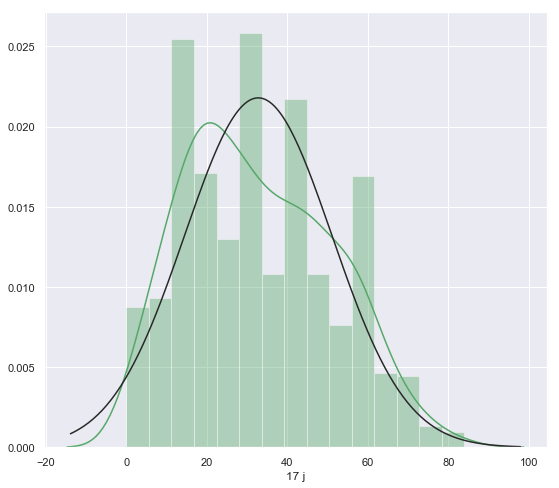

In [5]:
print(df['17 j'].describe())
from scipy.stats import norm
plt.figure(figsize=(9,8))
sns.distplot(df['17 j'].fillna(0), color='g',fit = norm);

count    959.000000
mean     390.501823
std       25.237795
min      296.750000
25%      373.466667
50%      390.476190
75%      407.406593
max      488.000000
Name: 5°C TMG (h), dtype: float64


C:\Users\hakim\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


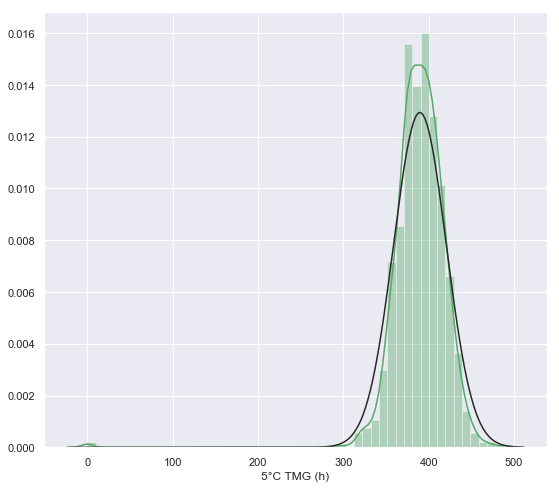

In [6]:
print(df['5°C TMG (h)'].describe())
from scipy.stats import norm
plt.figure(figsize=(9,8))
sns.distplot(df['5°C TMG (h)'].fillna(0), color='g',fit = norm);

In [7]:
print("Skewness: %f" % df['5°C TMG (h)'].skew())
print("Kurtosis: %f" % df['5°C TMG (h)'].kurt())

Skewness: -0.005900
Kurtosis: 0.316282


count    481.000000
mean     420.855094
std       36.513011
min      334.000000
25%      394.000000
50%      418.000000
75%      446.000000
max      503.000000
Name: 5°C T50 (h), dtype: float64


C:\Users\hakim\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


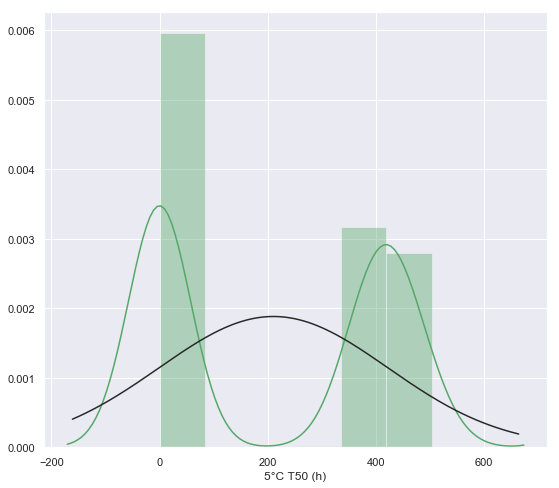

In [8]:
print(df['5°C T50 (h)'].describe())
from scipy.stats import norm
plt.figure(figsize=(9,8))
sns.distplot(df['5°C T50 (h)'].fillna(0), color='g',fit = norm);

### Histograme de toutes les variables existantes dans la base de données.

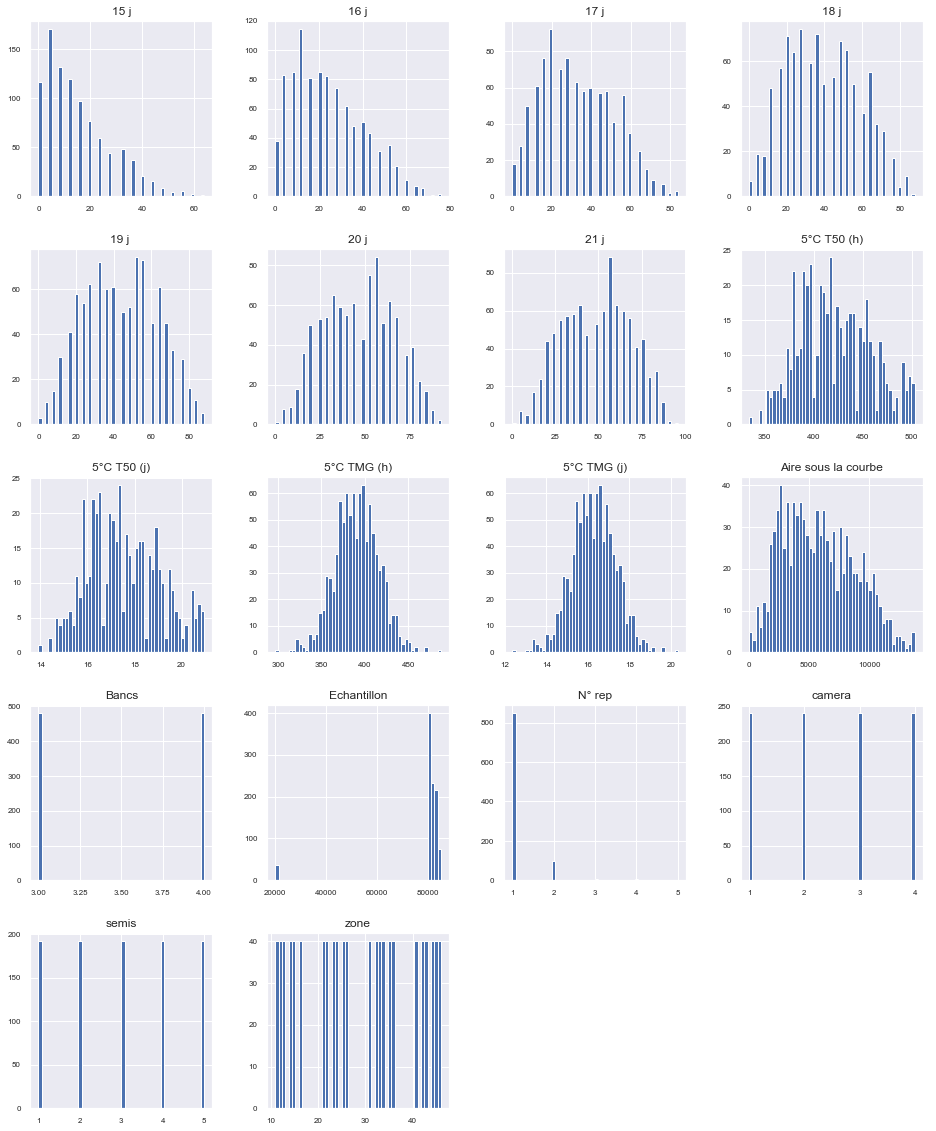

In [9]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

### Box-plot des variables catégoriques par rapport à la variables '17J':

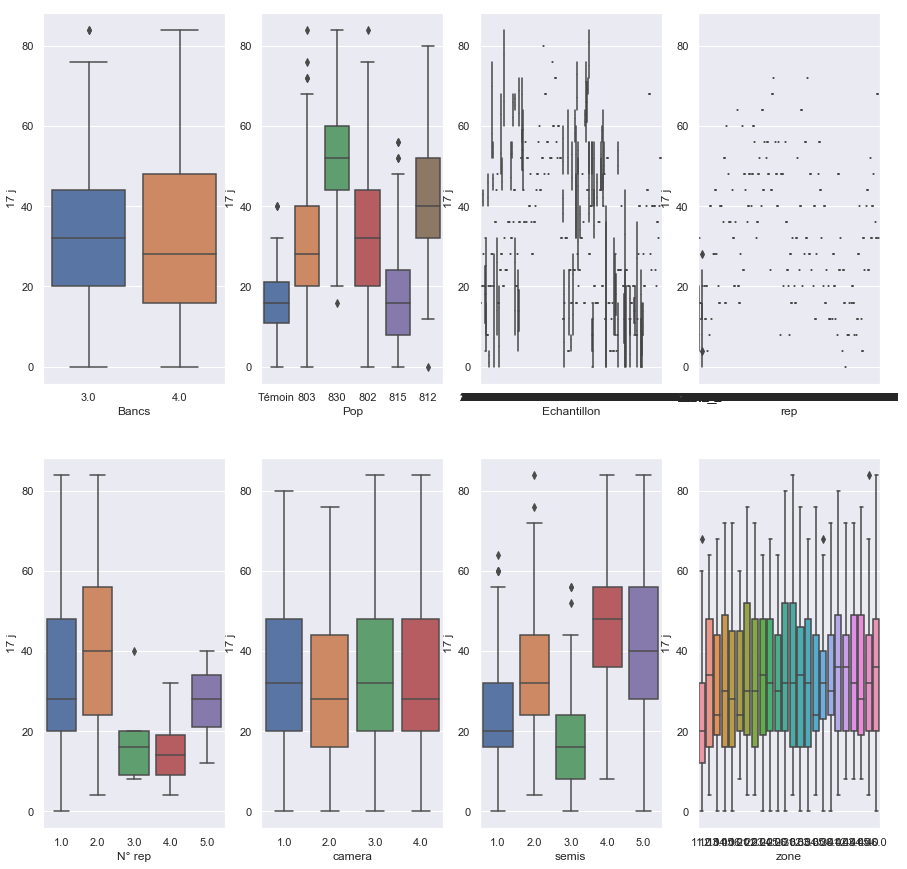

In [10]:
fig, ax = plt.subplots( ncols=4, nrows=2,figsize=(15,15))
for i in range(8):
    var = df.columns[i]
    data = pd.concat([df['17 j'], df[var]], axis=1).dropna()
    plt.subplot(str('24'+str(i+1)))
    sns.boxplot(x=var, y="17 j", data=data)


### Répartition des variabales continues par rapport à la variables '17j': 

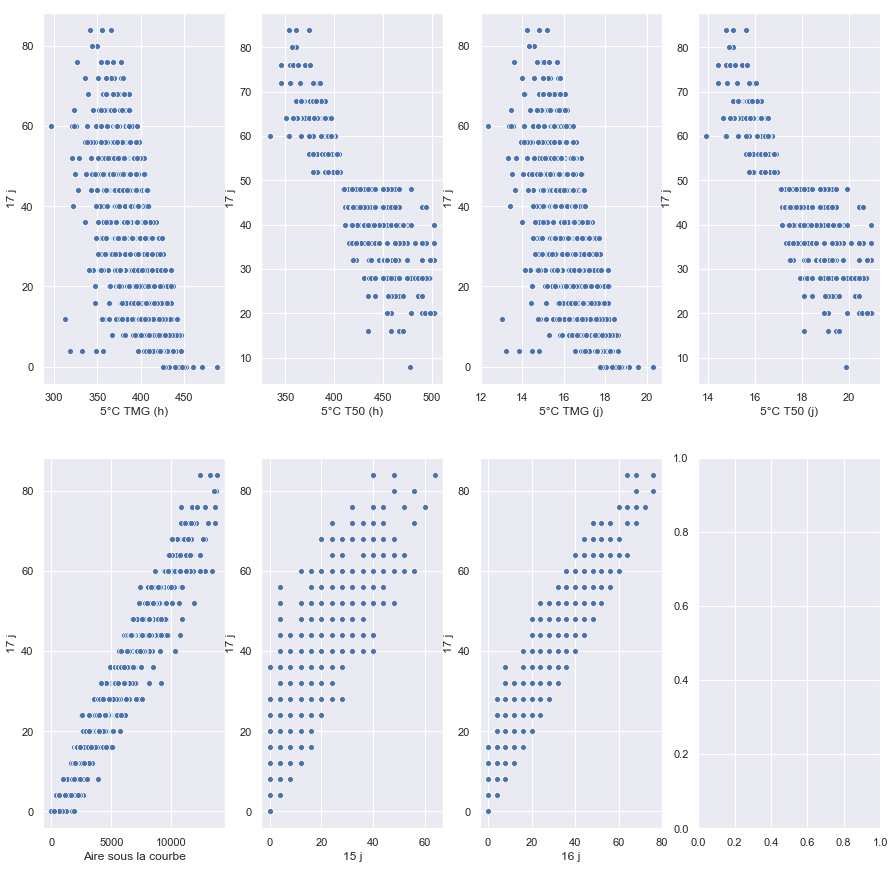

In [11]:
fig, ax = plt.subplots( ncols=4, nrows=2,figsize=(15,15))
columns = [ '5°C TMG (h)', '5°C T50 (h)', '5°C TMG (j)', '5°C T50 (j)',
       'Aire sous la courbe', '15 j', '16 j']
for i in range(7):
    var = columns[i]
    data = pd.concat([df['17 j'], df[var]], axis=1).dropna()
    plt.subplot(str('24'+str(i+1)))
    sns.scatterplot(x=var, y="17 j", data=data)


 ### Box-plot des variables catégoriques par rapport à la variables '5°C TMG(h)':

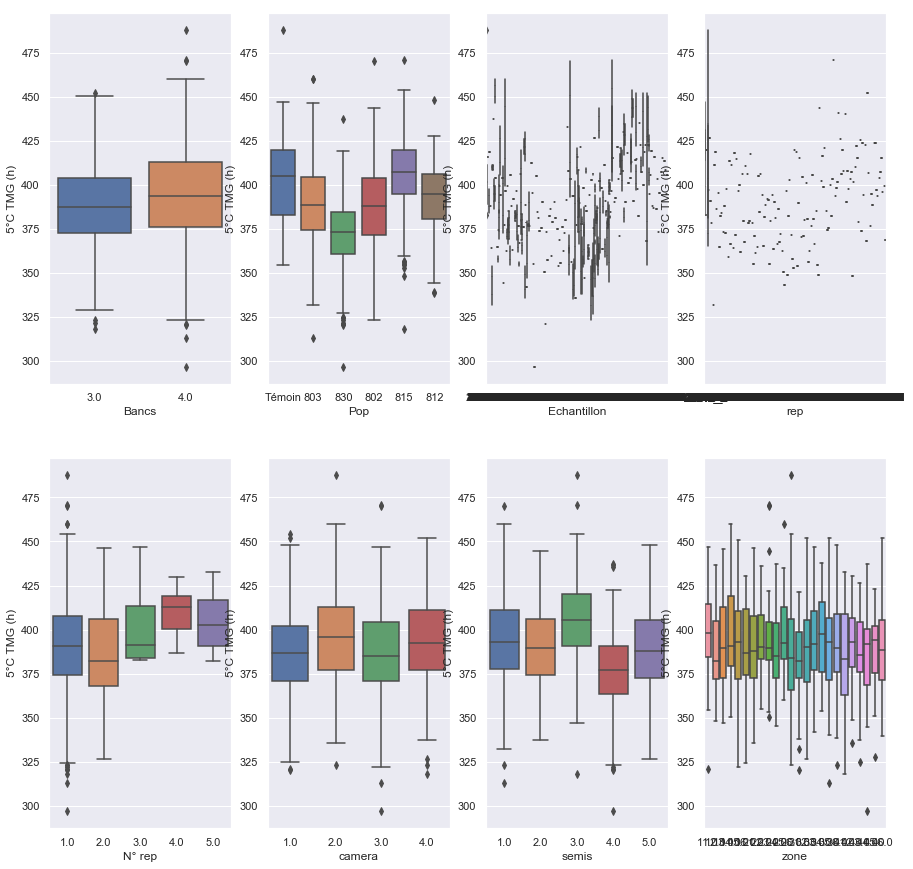

In [12]:
fig, ax = plt.subplots( ncols=4, nrows=2,figsize=(15,15))
for i in range(8):
    var = df.columns[i]
    data = pd.concat([df['5°C TMG (h)'], df[var]], axis=1).dropna()
    plt.subplot(str('24'+str(i+1)))
    sns.boxplot(x=var, y="5°C TMG (h)", data=data)


### Répartition des variabales continues par rapport à la variables '5°C TMG (h)':

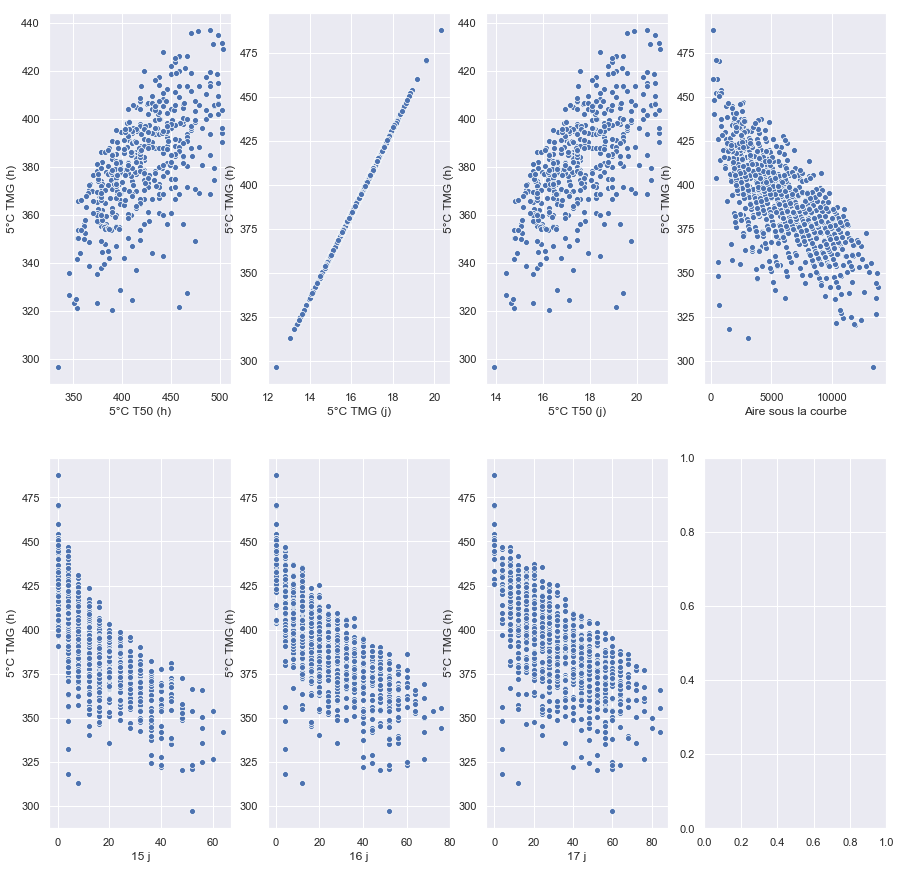

In [13]:
fig, ax = plt.subplots( ncols=4, nrows=2,figsize=(15,15))
columns = [ '5°C T50 (h)', '5°C TMG (j)', '5°C T50 (j)',
       'Aire sous la courbe', '15 j', '16 j','17 j']
for i in range(7):
    var = columns[i]
    data = pd.concat([df['5°C TMG (h)'], df[var]], axis=1).dropna()
    plt.subplot(str('24'+str(i+1)))
    sns.scatterplot(x=var, y="5°C TMG (h)", data=data)


In [14]:
df.columns


Index(['Bancs', 'Pop', 'Echantillon', 'rep', 'N° rep', 'camera', 'semis',
       'zone', '5°C TMG (h)', '5°C T50 (h)', '5°C TMG (j)', '5°C T50 (j)',
       'Aire sous la courbe', '15 j', '16 j', '17 j', '18 j', '19 j ', '20 j',
       '21 j'],
      dtype='object')

In [15]:
df = df.drop(columns=['18 j', '19 j ', '20 j','21 j'])

### Corrélation entre les variables

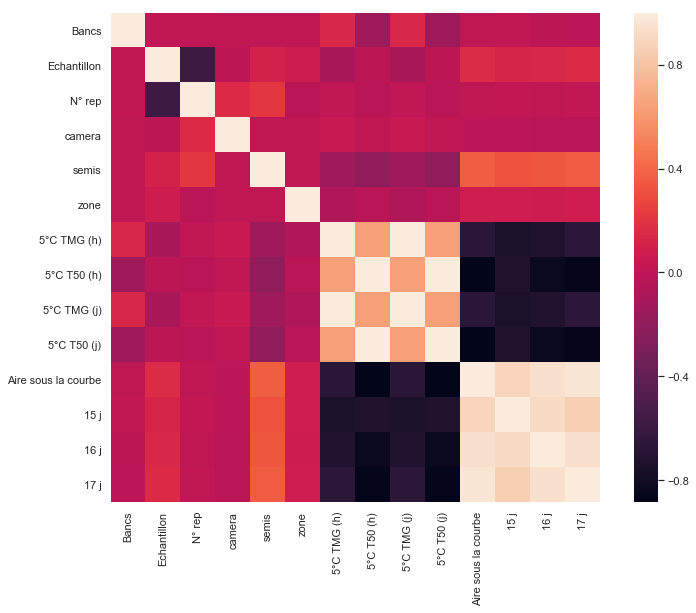

In [16]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);

### Matrice de corrélation ordonnée par rapport aux varibales les plus corrélé avec la variable '17j':

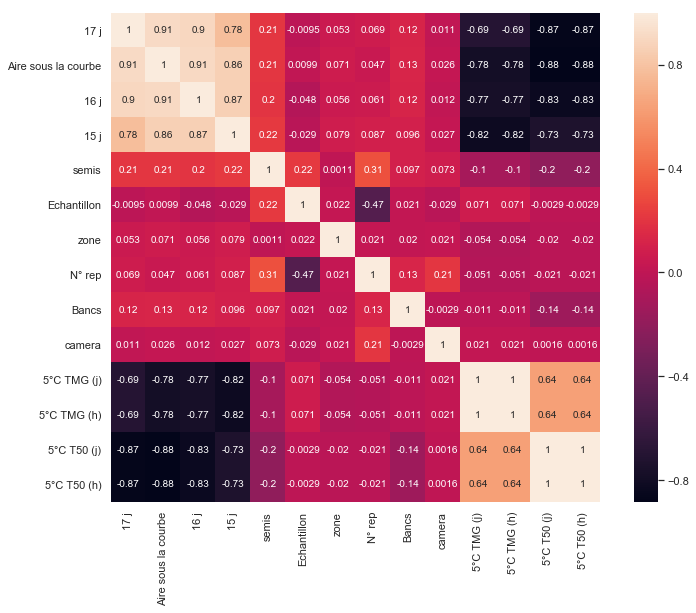

In [17]:

k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, '17 j')['17 j'].index
cm = np.corrcoef(df[cols].dropna().values.T)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Matrice de corrélation ordonnée par rapport aux varibales les plus corrélé avec la variable '5°C TMG':

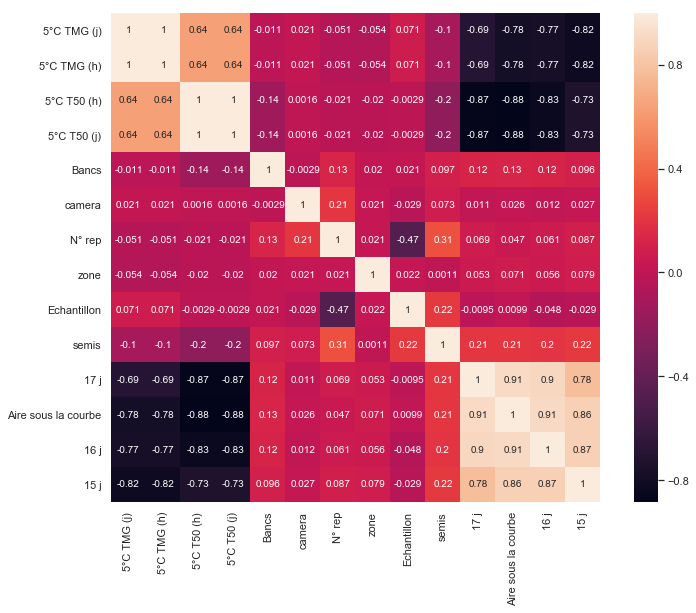

In [18]:

k = 15#number of variables for heatmap
cols = corrmat.nlargest(k, '5°C TMG (h)')['5°C TMG (h)'].index
cm = np.corrcoef(df[cols].dropna().values.T)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Distributions de toutes les variables entre elles:

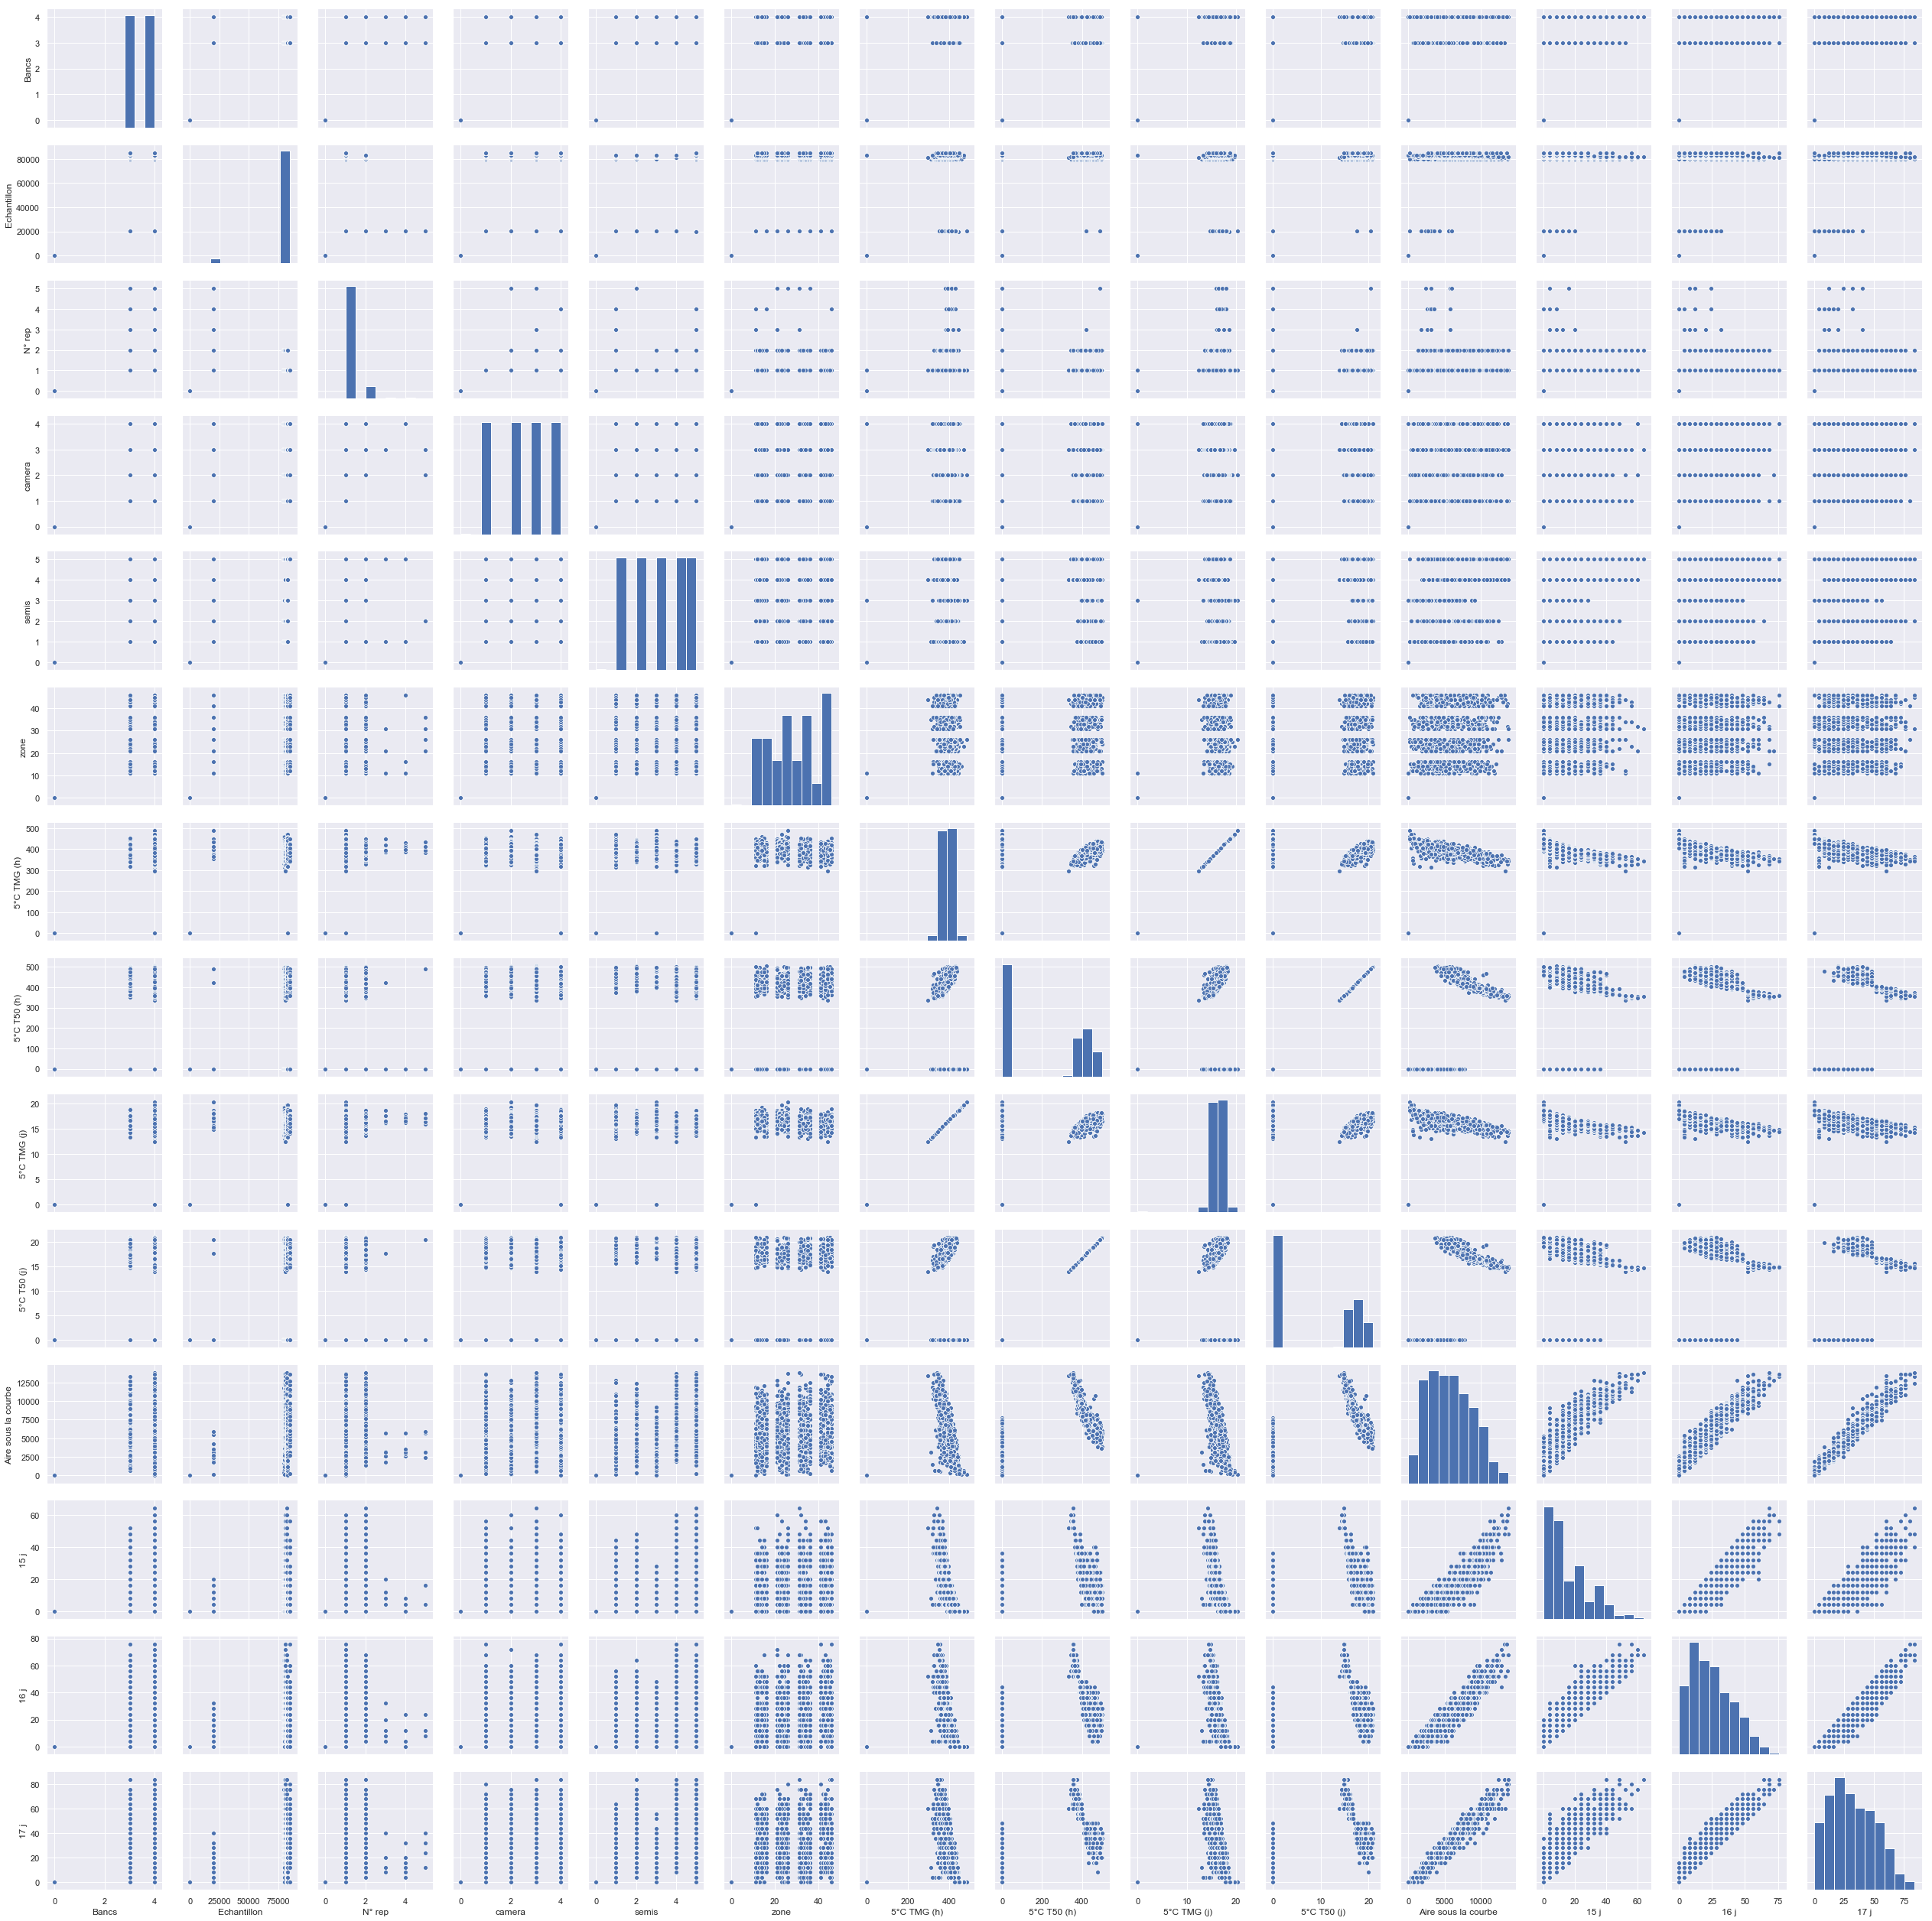

In [19]:
sns.pairplot(df.fillna(0))

### Pourcentage des valeurs manquantes:

In [20]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
5°C T50 (j),480,0.499480
5°C T50 (h),480,0.499480
5°C TMG (j),2,0.002081
5°C TMG (h),2,0.002081
17 j,1,0.001041
16 j,1,0.001041
15 j,1,0.001041
Aire sous la courbe,1,0.001041
zone,1,0.001041
semis,1,0.001041


La majorité des valeurs manquantes sont dans les variables '5°C T50 (h)' et '5°C T50 (j)', chose qui signifie dans la base de données que la semence n'a pas germé. On les remplaces donc par un 0.

In [21]:
df = df.fillna(0)

In [22]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
17 j,0,0.0
16 j,0,0.0
15 j,0,0.0
Aire sous la courbe,0,0.0
5°C T50 (j),0,0.0
5°C TMG (j),0,0.0
5°C T50 (h),0,0.0
5°C TMG (h),0,0.0
zone,0,0.0
semis,0,0.0


### Comparaison des la distribution de la varibale '17j' avec la ditribution Normale:

C:\Users\hakim\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


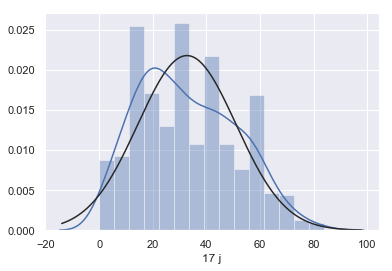

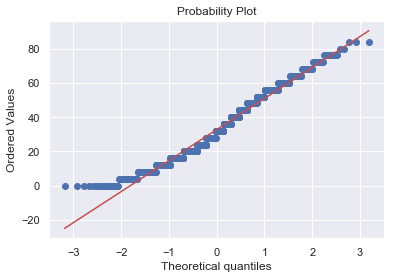

In [23]:
# Histogram and normal probability plot
from scipy import stats
sns.distplot(df['17 j'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['17 j'], plot=plt)

## Prédiction de la variable '17 j' et sélection des variables importantes:

In [24]:
df_reg = df
df_reg =df_reg.drop(columns=['Echantillon','rep'])
df_reg['semis'] = df_reg.semis.apply(str)
df_reg['zone'] = df_reg.zone.apply(str)
df_reg['Bancs'] = df_reg['Bancs'].apply(str)
df_reg['Pop'] = df_reg.Pop.apply(str)
df_reg['N° rep'] = df_reg['N° rep'].apply(str)
df_reg['camera'] = df_reg.camera.apply(str)
df_reg =pd.get_dummies(df_reg)
df_reg.head()

,5°C TMG (h),5°C T50 (h),5°C TMG (j),5°C T50 (j),Aire sous la courbe,15 j,16 j,17 j,Bancs_0.0,Bancs_3.0,...,zone_33.0,zone_34.0,zone_35.0,zone_36.0,zone_41.0,zone_42.0,zone_43.0,zone_44.0,zone_45.0,zone_46.0
0,414.000000,0.0,17.250000,0.0,2652.0,4.0,16.0,20.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,430.857143,0.0,17.952381,0.0,2652.0,0.0,4.0,4.0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,382.857143,0.0,15.952381,0.0,2652.0,8.0,12.0,20.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,420.000000,0.0,17.500000,0.0,2652.0,4.0,4.0,4.0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,432.888889,0.0,18.037037,0.0,2646.0,4.0,4.0,16.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
from sklearn.linear_model import ElasticNet, Lasso,  Ridge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

C:\Users\hakim\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Définition de la stratégie de validation des modèles:

In [26]:
#Validation function
y_train = df_reg['17 j']
df_reg = df_reg.drop(columns=['17 j'])

n_folds = 5 #Validation croisée de type 5-Fold 

def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df_reg.values)
    rmse= np.sqrt(-cross_val_score(model, df_reg.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

### Régréssion linéaire de type Ridge:

Text(0,0.5,'rmse')

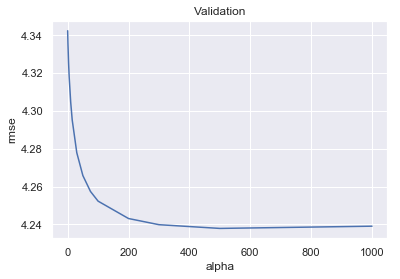

In [27]:
model_ridge = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75,100,200,300,500,1000] #espace des hyperparamètres du modèle.
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean()
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [28]:
cv_ridge.min()

4.237889516836565

Avec un alpha de valeur de 500 on trouve une érreur minimum de 4.24.

### Régression linéaire de type Lasso:

Text(0,0.5,'rmse')

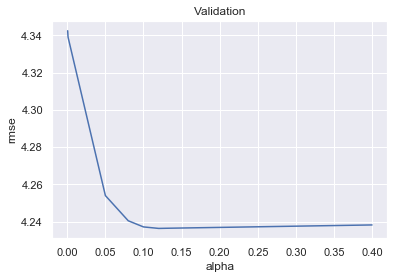

In [29]:
model_lasso = Lasso()
alphas = [ 0.4,0.13,0.12,0.1, 0.08,0.05,0.001, 0.0005]
cv_lasso = [rmse_cv(Lasso(alpha = alpha)).mean()
            for alpha in alphas]
cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_lasso.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [30]:
cv_lasso.min()

4.236325860504077

Avec un alpha de valeur de 0.14 on trouve une érreur minimum de 4.24. (Meme que celle du modèle Ridge).

In [31]:
model = Lasso(alpha=0.14)
model.fit(df_reg,y_train)
coef = pd.Series(model.coef_, index = df_reg.columns)

In [32]:
print("Lasso a choisi " + str(sum(coef != 0)) + " variables et a éléminé " +  str(sum(coef == 0)) + " variables")

Lasso a choisi 6 variables et a éléminé 53 variables


Text(0.5,1,'Coefficient du modèle Lasso')

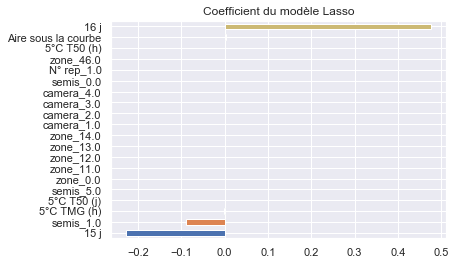

In [33]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
imp_coef.plot(kind = "barh")
plt.title("Coefficient du modèle Lasso")

On trouve que les variables '16j' et '15j' contribue bien dans l'explication de la varibale '17j' ainsi que la varibale semis_1.0 qui signifie que la sémence vient du semis 1.

### Arbres de décision :

Erreur avec le modèle de forets aléatoires: 4.2813 (0.2242)



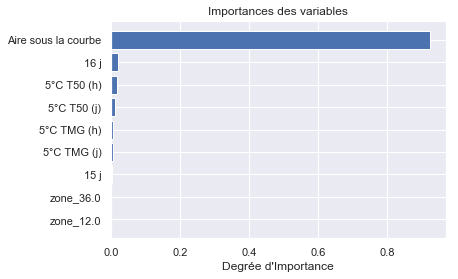

In [34]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(random_state=1, max_depth=10)

score = rmse_cv(model_rf)
print("Erreur avec le modèle de forets aléatoires: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
model_rf.fit(df_reg,y_train)
features = df_reg.columns
importances = model_rf.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Importances des variables')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Degrée d\'Importance')
plt.show()

Ici avec une erreur un peu grande que celle du modèle Lasso (4.28) On donne plus d'importance à la varibale 'Aire sous la courbe' pour l'explication de la varibale '17j'.

In [ ]:
import xgboost as xgb


dtrain = xgb.DMatrix(df_reg, label = y_train,silent = True)


params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100,verbose_eval=True)

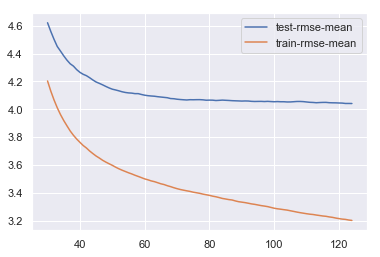

In [46]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

On trouve une erreur minimale de 4.1 pour le modèle Xgboost.

In [47]:
model_xgb = xgb.XGBRegressor(n_estimators=60, max_depth=2, learning_rate=0.1) 
model_xgb.fit(df_reg, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=60,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [48]:
df_reg_xg = df_reg
columns=[]
for column in df_reg.columns:
    columns.append(column.replace(' ',''))
    df_reg_xg[column.replace(' ','')] = df_reg[column]
df_reg.columns

Index(['5°C TMG (h)', '5°C T50 (h)', '5°C TMG (j)', '5°C T50 (j)',
       'Aire sous la courbe', '15 j', '16 j', 'Bancs_0.0', 'Bancs_3.0',
       'Bancs_4.0', 'Pop_802', 'Pop_803', 'Pop_812', 'Pop_815', 'Pop_830',
       'Pop_RECHERCHEV(C2;$U$3:$W$15;3;VRAI)', 'Pop_Témoin', 'N° rep_0.0',
       'N° rep_1.0', 'N° rep_2.0', 'N° rep_3.0', 'N° rep_4.0', 'N° rep_5.0',
       'camera_0.0', 'camera_1.0', 'camera_2.0', 'camera_3.0', 'camera_4.0',
       'semis_0.0', 'semis_1.0', 'semis_2.0', 'semis_3.0', 'semis_4.0',
       'semis_5.0', 'zone_0.0', 'zone_11.0', 'zone_12.0', 'zone_13.0',
       'zone_14.0', 'zone_15.0', 'zone_16.0', 'zone_21.0', 'zone_22.0',
       'zone_23.0', 'zone_24.0', 'zone_25.0', 'zone_26.0', 'zone_31.0',
       'zone_32.0', 'zone_33.0', 'zone_34.0', 'zone_35.0', 'zone_36.0',
       'zone_41.0', 'zone_42.0', 'zone_43.0', 'zone_44.0', 'zone_45.0',
       'zone_46.0', '5°CTMG(h)', '5°CT50(h)', '5°CTMG(j)', '5°CT50(j)',
       'Airesouslacourbe', '15j', '16j', 'N°rep_0.0', 

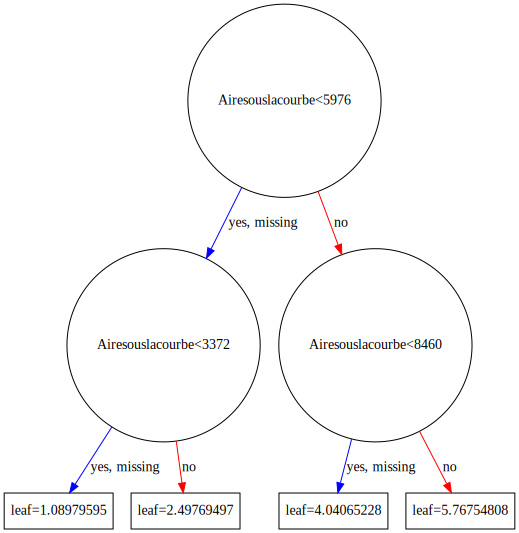

In [49]:

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

model_xgb.fit(df_reg_xg[columns], y_train)
from xgboost import plot_tree
xgb.to_graphviz(model_xgb)

<Figure size 720x720 with 0 Axes>

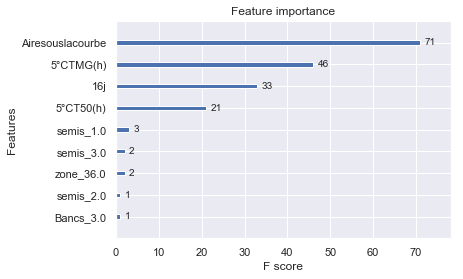

In [50]:
plt.figure(figsize=(10,10))
xgb.plot_importance(model_xgb)

Le modèle d'arbres aléatoire XGBoost donne la grande part d'importance à la varibale 'Aire sous la courbe' pour la prédiction de la variable '17j'

## Prédiction de la variables '5C TMG' et sélection des variables importantes:

In [51]:
df_reg_2 = df
y_train= df_reg_2['5°C TMG (h)']
df_reg_2 = df_reg_2.drop(columns=['5°C TMG (h)','5°C TMG (j)'])


In [52]:
df_reg_2.head()

,Bancs,Pop,Echantillon,rep,N° rep,camera,semis,zone,5°C T50 (h),5°C T50 (j),Aire sous la courbe,15 j,16 j,17 j
0,3.0,Témoin,20002.0,20002-1,1.0,1.0,5.0,11.0,0.0,0.0,2652.0,4.0,16.0,20.0
1,3.0,Témoin,20002.0,20002-2,2.0,2.0,5.0,11.0,0.0,0.0,2652.0,0.0,4.0,4.0
2,3.0,Témoin,20002.0,20002-3,3.0,3.0,5.0,11.0,0.0,0.0,2652.0,8.0,12.0,20.0
3,3.0,Témoin,20002.0,20002-4,4.0,4.0,5.0,11.0,0.0,0.0,2652.0,4.0,4.0,4.0
4,4.0,Témoin,20002.0,20002-1,1.0,1.0,5.0,11.0,0.0,0.0,2646.0,4.0,4.0,16.0


In [53]:

df_reg_2 =df_reg_2.drop(columns=['Echantillon','rep','17 j','16 j','15 j'])
df_reg_2['semis'] = df_reg_2.semis.apply(str)
df_reg_2['zone'] = df_reg_2.zone.apply(str)
df_reg_2['Bancs'] = df_reg_2['Bancs'].apply(str)
df_reg_2['Pop'] = df_reg_2.Pop.apply(str)
df_reg_2['N° rep'] = df_reg_2['N° rep'].apply(str)
df_reg_2['camera'] = df_reg_2.camera.apply(str)
df_reg_2 =pd.get_dummies(df_reg_2)
df_reg_2.head()

,5°C T50 (h),5°C T50 (j),Aire sous la courbe,Bancs_0.0,Bancs_3.0,Bancs_4.0,Pop_802,Pop_803,Pop_812,Pop_815,...,zone_33.0,zone_34.0,zone_35.0,zone_36.0,zone_41.0,zone_42.0,zone_43.0,zone_44.0,zone_45.0,zone_46.0
0,0.0,0.0,2652.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,2652.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,2652.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,2652.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,2646.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
#Validation function

n_folds = 5

def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df_reg_2.values)
    rmse= np.sqrt(-cross_val_score(model, df_reg_2.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

df_reg_2.columns

Index(['5°C T50 (h)', '5°C T50 (j)', 'Aire sous la courbe', 'Bancs_0.0',
       'Bancs_3.0', 'Bancs_4.0', 'Pop_802', 'Pop_803', 'Pop_812', 'Pop_815',
       'Pop_830', 'Pop_RECHERCHEV(C2;$U$3:$W$15;3;VRAI)', 'Pop_Témoin',
       'N° rep_0.0', 'N° rep_1.0', 'N° rep_2.0', 'N° rep_3.0', 'N° rep_4.0',
       'N° rep_5.0', 'camera_0.0', 'camera_1.0', 'camera_2.0', 'camera_3.0',
       'camera_4.0', 'semis_0.0', 'semis_1.0', 'semis_2.0', 'semis_3.0',
       'semis_4.0', 'semis_5.0', 'zone_0.0', 'zone_11.0', 'zone_12.0',
       'zone_13.0', 'zone_14.0', 'zone_15.0', 'zone_16.0', 'zone_21.0',
       'zone_22.0', 'zone_23.0', 'zone_24.0', 'zone_25.0', 'zone_26.0',
       'zone_31.0', 'zone_32.0', 'zone_33.0', 'zone_34.0', 'zone_35.0',
       'zone_36.0', 'zone_41.0', 'zone_42.0', 'zone_43.0', 'zone_44.0',
       'zone_45.0', 'zone_46.0'],
      dtype='object')

### Régression linéaire de type Ridge:

Text(0,0.5,'rmse')

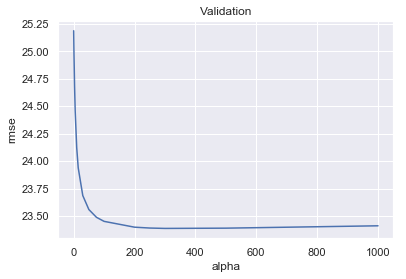

In [55]:
model_ridge = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75,100,200,250,300,500,1000]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean()
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

On trouve un erreur de 23.40 pour un alpha égal à : 250.

### Régression linéaire de type Lasso:

C:\Users\hakim\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\hakim\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\hakim\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\hakim\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

Text(0,0.5,'rmse')

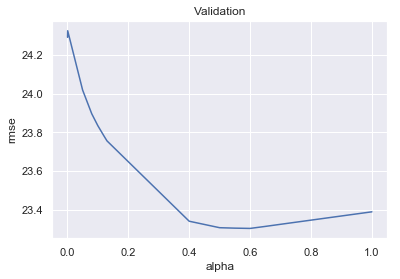

In [56]:
model_lasso = Lasso()
alphas = [ 1,0.7,0.65,0.6,0.55,0.5,0.4,0.13,0.12,0.1, 0.08,0.05,0.001, 0.0005]
cv_lasso = [rmse_cv(Lasso(alpha = alpha)).mean()
            for alpha in alphas]
cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_lasso.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

On trouve une erreur de 23.5 pour un alpha égale à 0.55.

Lasso picked 5 variables and eliminated the other 50 variables


Text(0.5,1,'Coefficients in the Lasso Model')

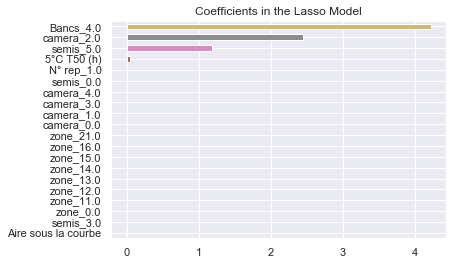

In [57]:
model = Lasso(alpha=0.55)
model.fit(df_reg_2,y_train)
coef = pd.Series(model.coef_, index = df_reg_2.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

On trouve que les variables 'Bancs numéro 5' et 'camera numero 2' et 'semis numero 5' contribue bien dans l'explication de la varibale 'TMG(h)'.

### Arbres de décision:

Erreur avec le modèle de forets aléatoires: 25.5055 (12.9255)



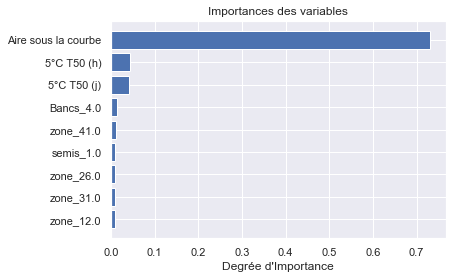

In [58]:
score = rmse_cv(model_rf)
print("Erreur avec le modèle de forets aléatoires: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
model_rf.fit(df_reg_2,y_train)
features = df_reg_2.columns
importances = model_rf.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Importances des variables')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Degrée d\'Importance')
plt.show()


In [ ]:
import xgboost as xgb


dtrain = xgb.DMatrix(df_reg_2, label = y_train,silent=True)


params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100,verbose_eval=True)

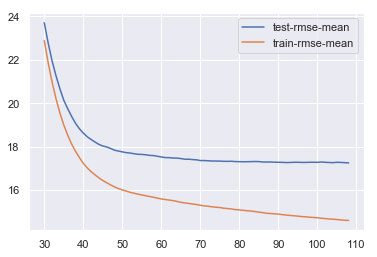

In [60]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

On trouve une erreur minimale de 17.5 pour le modèle Xgboost.

In [61]:
model_xgb = xgb.XGBRegressor(n_estimators=65, max_depth=2, learning_rate=0.1) 



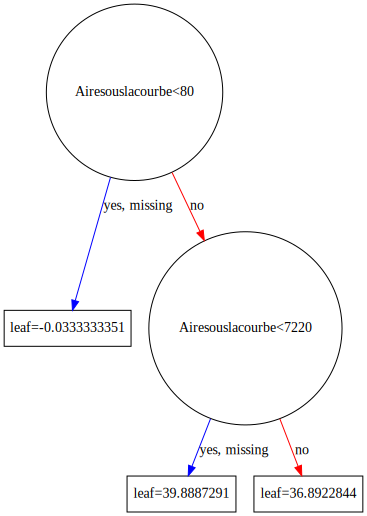

In [62]:
df_reg_xg_2 = df_reg_2
columns=[]
for column in df_reg_2.columns:
    columns.append(column.replace(' ',''))
    df_reg_xg_2[column.replace(' ','')] = df_reg[column]
df_reg.columns

model_xgb.fit(df_reg_xg_2[columns], y_train)
from xgboost import plot_tree
xgb.to_graphviz(model_xgb)

<Figure size 720x720 with 0 Axes>

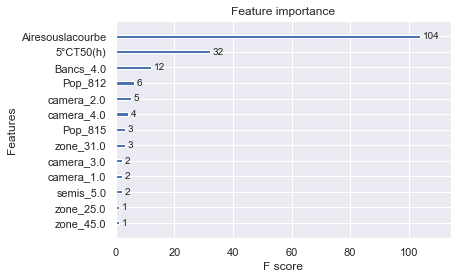

In [63]:
plt.figure(figsize=(10,10))
xgb.plot_importance(model_xgb)

Le modèle d'arbres aléatoire XGBoost donne la plus part d'importance à la varibale 'Aire sous la courbe' pour la prédiction de la variable 'TMG (h)'

## Approche par Réduction de dimensions:

## Approche par assemblage de modèles :